In [1]:
%load_ext autoreload
% autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import gm2
import trfp
import helper_function_candidates as helper
import plotting_functions as plt2
import analysis_helper as help2

Welcome to JupyROOT 6.12/04


In [2]:
# import all the fixed probe runs
# fp_moment_df = helper.import_fp_moment_runs('60hr_fixed_probe_runs.h5', range(3959, 3961))
fp_moment_df = helper.import_fp_moment_runs('60hr_fixed_probe_runs.h5', range(3959, 3995))

# fp_moment_df = help2.calc_moment_df(help2.root_to_pandas(range(3960,3995), prefix='v9_21_03_dev/FieldPlainRootOutput_', tr_run=False))

Appending fixed probe runs.
Appending run 3994.                                  
Done appending fixed probe runs.


52000.75086914434


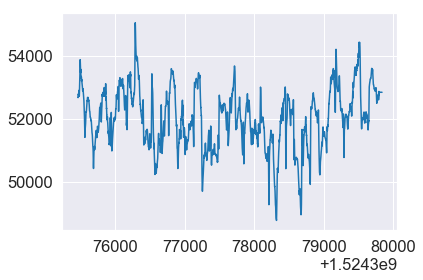

In [21]:
plt.plot(tr_single_runs_df_1[3956]['tr,m1'])
print np.mean(tr_baseline_1[:,0])

In [3]:
# import all trolley runs (keep CW run for baselines)
tr_moment_df_1, tr_single_runs_df_1 = helper.import_tr_moment_runs('60hr_trolley_runs_1.h5',
                                                                   range(3956, 3959),
                                                                   specific_runs=[3956],
                                                                   corrected=True)

tr_moment_df_2, tr_single_runs_df_2 = helper.import_tr_moment_runs('60hr_trolley_runs_2.h5',
                                                                   range(3995,3999),
                                                                   specific_runs=[3997, 3998],
                                                                   corrected=True)

# tr_single_runs_df_1 = help2.calc_moment_df(help2.root_to_pandas(range(3956,3957), prefix='v9_21_03_dev/FieldPlainRootOutput_', tr_run=True))
# tr_single_runs_df_2 = help2.calc_moment_df(help2.root_to_pandas(range(3997,3998), prefix='v9_21_03_dev/FieldPlainRootOutput_', tr_run=True))

# tr_corr_df_1 = trfp.remove_trolley_effect(tr_single_runs_df_1)
# tr_corr_df_2 = trfp.remove_trolley_effect(tr_single_runs_df_2)

# tr_fixed_run_df = tr_single_runs_df_2[3997].iloc[:-20].append(tr_single_runs_df_2[3998].iloc[:17])
# tr_fixed_run_df_corr = trfp.remove_trolley_effect(tr_fixed_run_df)

tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, summed_pts_1 = helper.trolley_run_station_average(tr_single_runs_df_1[3956])
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, summed_pts_2 = helper.trolley_run_station_average(tr_single_runs_df_2[3997])

Appending corrected trolley runs.
Appending run 3956.
Finished removing trolley images from 4382 events.                                                            
Appending run 3957.
Finished removing trolley images from 2977 events.                                                            
Appending run 3958.
Finished removing trolley images from 539 events.              

Done appending corrected trolley runs.
Appending corrected trolley runs.
Appending run 3995.
Finished removing trolley images from 365 events.         
Appending run 3996.
Finished removing trolley images from 921 events.                       
Appending run 3997.
Finished removing trolley images from 4359 events.                                                            
Appending run 3998.
Finished removing trolley images from 2853 events.                                                            

Done appending corrected trolley runs.


In [4]:
vtm_df_2 = helper.vtm_calc(fp_moment_df,
             baseline_time_1, baseline_time_2,
             tr_baseline_1, tr_baseline_2,
             fp_baseline_1, fp_baseline_2)

vtm_tr1_df = helper.vtm_calc(tr_moment_df_1.drop(columns=['tr_phi']+['tr,m'+str(m+1) for m in range(17)]),
             baseline_time_1, baseline_time_2,
             tr_baseline_1, tr_baseline_2,
             fp_baseline_1, fp_baseline_2)

vtm_tr2_df = helper.vtm_calc(tr_moment_df_2.drop(columns=['tr_phi']+['tr,m'+str(m+1) for m in range(17)]),
             baseline_time_1, baseline_time_2,
             tr_baseline_1, tr_baseline_2,
             fp_baseline_1, fp_baseline_2)

# vtm_full_df = vtm_tr1_df.append(vtm_df_2, sort=False).append(vtm_tr2_df, sort=False)
vtm_full_df = vtm_df_2.copy()

In [8]:
### Bin into the agreed upon bins

bins = np.arange(1524384055, 1524641055, 1000)-500  # bin edges
bin_centers = np.arange(1524384055, 1524640055, 1000)

vtm_bin_df = vtm_df_2.groupby(pd.cut(vtm_df_2.index, bins)).mean()
vtm_bin_df.index = bin_centers

In [ ]:
print tr_baseline_1[41,0]

In [ ]:
fp_moment_df.index.values[0]

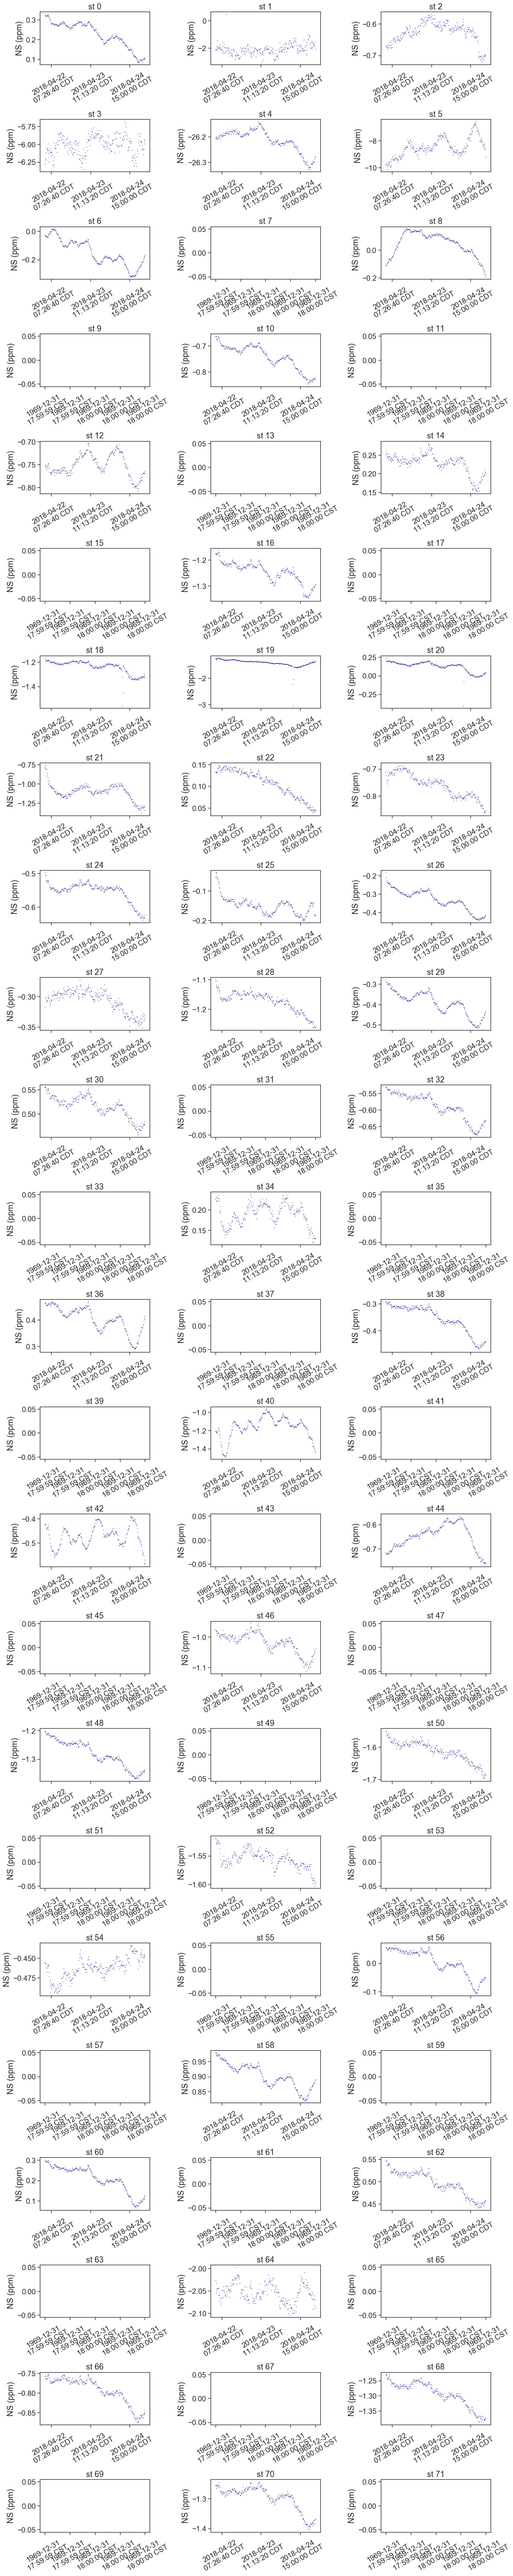

In [6]:
fig, axs = plt.subplots(24,3)

for i in range(24):
    for j in range(3):
        plt.sca(axs[i,j])
        st = i*3 + j
        plt.plot(vtm_bin_df_2.index.values, vtm_bin_df_2['st'+str(st)+',m5']/61.79, '.', markersize=1, color='navy')
        plt2.plt_set_labels(axs[i,j], '', 'NS (ppm)', 'st '+str(st))
        plt2.plt_unix_time_to_CST(axs[i,j])

fig.set_size_inches(16, 80)
fig.tight_layout()
# fig.savefig('purcell_7-30_n6pole_stations.png', dpi=100)

In [9]:
test_df = vtm_bin_df.copy()

azi_avg_df = pd.DataFrame(np.zeros((test_df.shape[0],6)),
                         index = test_df.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])

for m in range(5):
    weight = summed_azimuth_1[:, m] + summed_azimuth_2[:, m]
    total_weight = np.nansum(weight)
    stm_list = ['st'+str(st)+',m'+str(m+1) for st in np.arange(72)]
    azi_avg_df['m'+str(m+1)] = test_df[stm_list].multiply(weight).sum(axis=1)/total_weight
    
print_df = azi_avg_df[['m1','m2','m3','m5']].copy()/61.79
print_df['m1_err'] = 0.116
print_df['m2_err'] = 0.06
print_df['m3_err'] = 0.06
print_df['m5_err'] = 0.1

print_df = print_df.sort_index(axis='columns')

print_df.head()

# print_df.to_csv('purcell_60hr_7-30.csv')

,m1,m1_err,m2,m2_err,m3,m3_err,m5,m5_err
1524384055,841.711859,0.116,0.052576,0.06,0.158282,0.06,-0.891433,0.1
1524385055,841.713378,0.116,0.063037,0.06,0.157751,0.06,-0.890853,0.1
1524386055,841.717253,0.116,0.067473,0.06,0.158453,0.06,-0.888600,0.1
1524387055,841.692693,0.116,0.063925,0.06,0.159006,0.06,-0.900782,0.1
1524388055,841.707269,0.116,0.070839,0.06,0.159230,0.06,-0.895472,0.1


In [15]:
print tr_baseline_1[:,0] - np.array([51463.934051843964, 50331.32700658142, 50349.96776092092, 51605.22006684789, 52419.95841191892, 52289.14636121807, 51931.65837933315, 49905.772951547115, 50910.98248935946, 50776.9341981398, 51379.55387315803, 52062.13732694021, 51586.50836038211, 51502.0269819105, 52450.42106176755, 51416.00375982881, 52252.69746079167, 52601.383976258185, 52485.74252351922, 51827.91222090892, 52391.81335974577, 51597.059289106095, 50978.74524157513, 51164.30821915775, 50971.98447862249, 51119.60523102058, 53278.73445903878, 52265.441051003596, 51669.60564114966, 51384.80790429587, 51925.160160369385, 51507.04291546605, 53371.126917420734, 52598.6618029167, 51896.423545415164, 51325.03401925035, 50603.0006881666, 52038.260392927856, 51407.38179679198, 51754.918958537884, 53036.49310367744, 53614.423797872834, 52926.535464758934, 52588.94792335913, 53003.82810577646, 52928.38214693839, 51942.83708570015, 51505.98851245237, 52553.38878727476, 52538.76246757816, 51714.32957845611, 51267.688588457975, 52412.38988779975, 52316.14234514656, 53203.758476466974, 52773.19748209271, 53275.44012801592, 52452.058811029965, 52091.62649962213, 53122.940567821606, 53602.069024611825, 52668.62506265316, 52103.92107355607, 51902.076279156296, 52790.75090575232, 53238.95392590475, 53150.66896219041, 51678.977874905424, 51381.75940703159, 51379.92926191958, 52502.02587589243, 51450.13697775489])

[-25.31558519 -23.64682094 -26.71404173 -26.49013216 -25.22044734
 -28.60600194 -26.81362889 -26.46378796 -25.53337818 -25.29448456
 -26.549696   -24.56353254 -23.60280056 -26.29445089 -25.14255707
 -26.93326131 -25.52049175 -26.5019507  -24.56129295 -26.23179107
 -26.04197717 -24.46606693 -26.23167119 -25.41060763 -27.53417576
 -27.43454381 -25.41952992 -26.58399669 -16.86910511 -27.00352463
 -27.31746793 -27.07708352 -25.30314616 -24.79616354 -26.42040114
 -25.29573952 -28.06593574 -25.42865018 -26.09395768 -26.29937471
 -26.84867917 -25.16801155 -26.40369137 -25.86348278 -26.06196742
 -24.95141396 -25.50289197 -26.8660464  -24.76333595 -26.19193001
 -26.08280558 -25.94333272 -25.54616727 -26.12115429 -26.17758294
 -26.38017677 -26.03370013 -25.86057794 -26.30961109 -25.42105168
 -25.87682246 -27.29489416 -25.87379942 -26.22915666 -26.44557487
 -25.78285605 -25.49540333 -26.29864831 -25.94541392 -26.28748666
 -26.21662895 -26.05955995]


m1    840.878154
m2      0.169566
m3      0.365140
m4      0.359064
m5     -0.947423
m6      0.000000
Name: 1524639055, dtype: float64


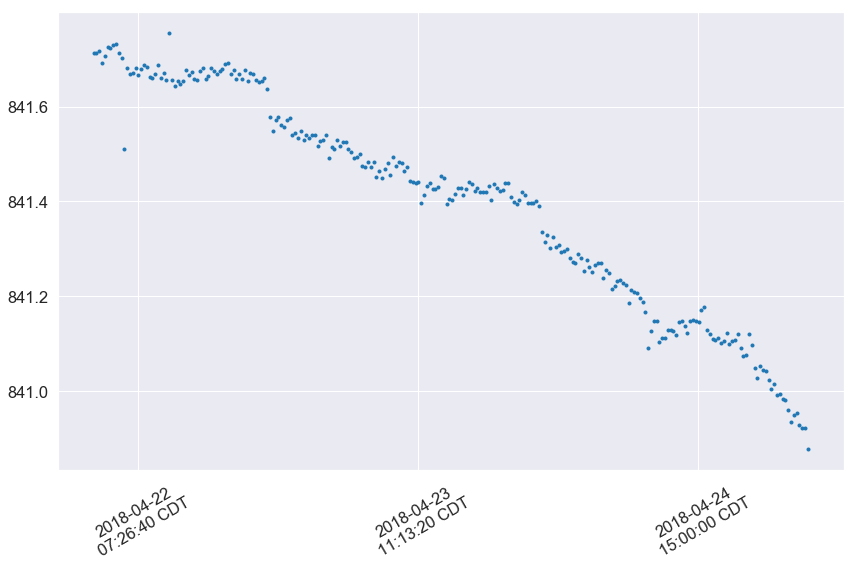

In [10]:
sns.set_style('darkgrid')

print  azi_avg_df.iloc[-1]/61.79

fig, ax = plt.subplots(1,1)
plt.sca(ax)
plt.plot(azi_avg_df.index.values, azi_avg_df['m1']/61.79, '.')
# plt.plot(vtm_df.index.values, vtm_df['st30,m1'], '.')

plt2.plt_unix_time_to_CST(ax)
fig.set_size_inches(12,8)
fig.tight_layout()

In [ ]:
print np.nansum(tr_baseline_1[:,0]*summed_azimuth_1[:,0])/360
print np.nansum(tr_baseline_2[:,0]*summed_azimuth_2[:,0])/360

In [ ]:
# print tr_baseline_1[18,0]/61.79
# print tr_baseline_2[18,0]/61.79
# print (tr_baseline_2[18,0] - tr_baseline_1[18,0])/61.79

# print tr_baseline_1[18,4]/61.79
# print tr_baseline_2[18,4]/61.79
# print (tr_baseline_2[18,4] - tr_baseline_1[18,4])/61.79

print np.round((tr_baseline_2[:,0] - tr_baseline_1[:,0])/61.79, 3)

plt.plot(trfp.STATION_BARCODE_PHI, (tr_baseline_2[:,0] - tr_baseline_1[:,0])/61.79, '.')
plt.title('run2 - run1 dipole baselines')
plt.ylabel(r'$\Delta$ dipole (ppm)')

In [ ]:
bloch_diffs = np.loadtxt('bloch_differences.csv', delimiter=',')
print bloch_diffs.shape

In [ ]:
plt.plot(bloch_diffs[:,1] - ((tr_baseline_2[:,4] - tr_baseline_1[:,4])/61.79), '.')
plt.title('bloch - purcell NS diff diffs')
plt.ylabel(r'$\Delta\Delta$ NS (ppm)')

In [ ]:
print bloch_diffs[:,0] - ((tr_baseline_2[:,0] - tr_baseline_1[:,0])/61.79)

In [ ]:
tr_interp_1 = np.interp(np.arange(0,360,0.1), tr_single_runs_df_1[3956]['tr_phi'], tr_single_runs_df_1[3956]['tr,m5'], period=360)
tr_interp_2 = np.interp(np.arange(0,360,0.1), tr_single_runs_df_2[3997]['tr_phi'], tr_single_runs_df_2[3997]['tr,m5'], period=360)

plt.plot(np.arange(0,360,0.1), (tr_interp_2-tr_interp_1)/61.79, '.')
fig = plt.gcf()
fig.set_size_inches(12,4)
plt.ylabel('difference n 6-pole (ppm)')
plt.title('run 3997 - run 3956, n 6-pole')

In [ ]:
# ### Azimuthal averaging of the trolley runs.

# tr_cols = ['tr_phi'] + ['tr,m'+str(m+1) for m in range(17)]

# # azi_avg_df = tr_single_runs_df_1[3956][tr_cols].copy()
# # azi_avg_df = tr_single_runs_df_2[3997][tr_cols].copy()
# azi_avg_df = tr_fixed_run_df[tr_cols].copy()

# # sort by tr_phi
# azi_avg_df = azi_avg_df.sort_values(by=['tr_phi'])
# measured_phi = azi_avg_df['tr_phi'].values
# measured_extent = (np.roll(measured_phi,-1)-np.roll(measured_phi,1))/2
# measured_extent[0] = measured_extent[0]+180
# measured_extent[-1] = measured_extent[-1]+180

# azi_avg_df['tr_extent'] = pd.Series(measured_extent, index=azi_avg_df.index)
# azi_avg_df = azi_avg_df.sort_index()
# # azi_avg_df = azi_avg_df.iloc[1:-1]

# print np.sum((azi_avg_df['tr_extent'].values * azi_avg_df['tr,m1'].values))/np.sum(azi_avg_df['tr_extent'].values)

# # mask a chunk, and calculate the weighted average in that chunk
# chunk_size = 45
# chunks = np.arange(262.226, 262.226-360.-chunk_size, -chunk_size)%360
# # chunks = np.arange(0,360,chunk_size)

# avg_m1 = np.empty(len(chunks)-1)

# ii=0
# for chunk in chunks[0:-1]:
#     if chunks[ii] > chunks[ii+1]:
#         mask = (azi_avg_df['tr_phi'] <= chunk) & (azi_avg_df['tr_phi'] > chunk - chunk_size)
#     else:
#         mask = (azi_avg_df['tr_phi'] <= chunk) | (azi_avg_df['tr_phi'] > (chunk - chunk_size)%360)
# #     mask = (azi_avg_df['tr_phi'] >= chunk) & (azi_avg_df['tr_phi'] < chunk + chunk_size)
#     masked_df = azi_avg_df[mask].copy()
#     avg_m1[ii] = np.sum((masked_df['tr_extent'].values * masked_df['tr,m1'].values))/np.sum(masked_df['tr_extent'].values)
# #     avg_m1[ii] = np.mean(masked_df['tr,m1'].values)
#     ii += 1

# print np.round(avg_m1/61.79,4)
# print np.round(np.mean(avg_m1)/61.79,4)

# # rachels = [827.158, 843.35, 832.939, 840.858, 839.643, 848.998, 847.843, 844.759, 855.821, 851.28, 834.809, 833.256]
# # rachels = [853.423, 839.411, 841.514, 843.103, 846.196, 854.245, 860.909, 849.704, 836.338, 824.734, 843.18, 850.953, 835.783, 839.038, 847.717, 826.173, 828.564, 844.066, 850.029, 838.228, 841.825, 837.977, 827.122, 816.239, 842.408, 842.648, 814.754, 830.901, 841.447, 832.1, 860.263, 847.409, 846.18, 864.561, 844.672, 858.153]
# # rachels = [847.211, 837.801, 834.578, 847.358]
# rachels = [848.295, 848.26, 831.263, 832.374, 836.94, 828.263, 846.873, 854.249+0.120]

# print np.mean(rachels)
# print np.mean(avg_m1/61.79)
# print np.mean(rachels - avg_m1/61.79)
# print np.std(rachels - avg_m1/61.79)

# fig, ax = plt.subplots(2,1)
# plt.sca(ax[0])
# plt.plot(avg_m1/61.79, rachels, '.', color='red')

# plt.sca(ax[1])
# plt.plot(rachels - avg_m1/61.79, '.', color='red')

# fig.set_size_inches(12,8)
# fig.tight_layout()

In [ ]:
# ### NOTE: This cell has been incorporated in helper functions.

# vtm_df = fp_moment_df.copy()

# for st in range(72):
#     num_probes = trfp.STATION_PROBE_NUMBER[st]

#     if num_probes == 4:
#         num_moments = 4
#         if st == 41: J = trfp.J_4_PROBE_ST41
#         elif st == 37 | st == 39: J = trfp.J_4_PROBE_ST37_ST39
#         else: J = trfp.J_4_PROBE
#     else:
#         num_moments = 5
#         if st < 7: J = trfp.J_6_PROBE_OFFSET
#         else: J = trfp.J_6_PROBE
# #         J[0,4] = 0

#     # first subtract fixed probe baseline from vtm_df
#     for m in range(num_probes):
#         stm = 'st'+str(st)+',m'+str(m+1)

#         def __backwards_correction(time):
#             c1 = fp_baseline_1[st, m]
#             c2 = fp_baseline_2[st, m]
#             t1 = baseline_time_1[st, m]
#             t2 = baseline_time_2[st, m]
#             return (c2-c1)/(t2-t1)*(time-t1) + c1

#         vtm_df[stm] = vtm_df[stm] - __backwards_correction(vtm_df.index.values)

#     # next apply the Jacobian to the station
#     stms = ['st'+str(st)+',m'+str(m+1) for m in range(num_moments)]
#     vtm_df[stms] = vtm_df[stms].dot(np.transpose(J))

#     # finally add trolley baseline to vtm_df
#     for m in range(num_probes):
#         stm = 'st'+str(st)+',m'+str(m+1)

#         def __backwards_correction(time):
#             c1 = tr_baseline_1[st, m]
#             c2 = tr_baseline_2[st, m]
#             t1 = baseline_time_1[st, m]
#             t2 = baseline_time_2[st, m]
#             return (c2-c1)/(t2-t1)*(time-t1) + c1

#         vtm_df[stm] = vtm_df[stm] + __backwards_correction(vtm_df.index.values)

# print '\nDone.'
